In [2]:
import numpy as np
from scipy.special import factorial
import pylab as plt
%matplotlib inline

In [3]:
n = 50
s = 10

In [9]:
def E(k, X, theta):
    # counting k-th sample moments for each sample in X
    A = [1/50*sum(x ** k for x in row) for row in X]
    # counting estimated theta using sample moments
    Theta = [theta(a, k) for a in A]
    # estimating deviation from real value
    E = 1/s * sum((t - 1) ** 2 for t in Theta)
    return E

In [16]:
X_u = []
for i in range(10):
    X_u.append(np.random.uniform(0, 1, n))
    
theta_u = lambda x, k: (x * (k + 1)) ** (1/k)

E_u = []
for k in range(1, 100):
    E_u.append(E(k, X_u, theta_u))

In [15]:
X_exp = []
for i in range(10):
    X_exp.append(np.random.exponential(1, n))
    
theta_exp = lambda x, k: (x / factorial(k)) ** (1/k)

E_exp = []
for k in range(1, 100):
    E_exp.append(E(k, X_exp, theta_exp))

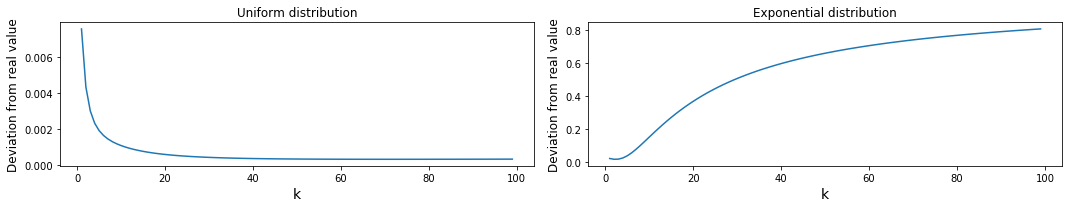

In [34]:
# show dependency of deviation from order of sample moment
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.title('Uniform distribution')
plt.plot(range(1, 100), E_u)
plt.ylabel('Deviation from real value', fontsize=12)
plt.xlabel('k', fontsize=14)

plt.subplot(122)
plt.title('Exponential distribution')
plt.plot(range(1, 100), E_exp)
plt.ylabel('Deviation from real value', fontsize=12)
plt.xlabel('k', fontsize=14)

plt.tight_layout()